In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# inputevets_filtered = pd.read_csv("filtered\\input_events_filtered_by_subject_id_and_medicine.csv")
# chartevents_filtered = pd.read_csv("filtered\\filtered_chartevents.csv")
# icustays_filtered = pd.read_csv("filtered\\filtered_icustays.csv")
patients_filtered = pd.read_csv("filtered\\filtered_patients.csv")
# procedureevents_filtered = pd.read_csv("filtered\\filtered_procedureevents.csv")
# labevents_filtered = pd.read_csv("filtered\\filtered_labevents.csv")
# transfers_filtered = pd.read_csv("filtered\\filtered_transfers.csv")
# itemid = pd.read_csv("data\\icu\\d_items.csv")

In [37]:
patients_filtered

,Unnamed: 0,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title,gender,anchor_age,dod
0,0,14559749,26693268,18,99591,9,Sepsis,M,71,2154-05-30
1,1,19599475,21996765,14,99591,9,Sepsis,F,74,NaN
2,2,15138108,21384778,6,99591,9,Sepsis,M,83,2116-08-29
3,3,13276920,28598982,11,99591,9,Sepsis,F,78,NaN
4,4,17190067,25034925,6,99591,9,Sepsis,M,91,NaN
...,...,...,...,...,...,...,...,...,...,...
21616,21616,15035666,22747083,12,T8144XA,10,"Sepsis following a procedure, initial encounter",F,66,2167-12-13
21617,21617,13824977,26341522,8,T8144XA,10,"Sepsis following a procedure, initial encounter",M,69,NaN
21618,21618,12167940,27983916,7,T8144XA,10,"Sepsis following a procedure, initial encounter",F,63,NaN
21619,21619,17169334,28390536,13,T8144XA,10,"Sepsis following a procedure, initial encounter",M,77,NaN


In [ ]:
# subject_ids_icustays = icustays_filtered.groupby(by="subject_id").agg({"same":"sum"})
# plt.pie((subject_id_dead["same"] > 0).value_counts(), autopct='%1.1f%%', labels=["same unit", "different unit"])
# total_num = (subject_ids_icustays["same"] > 0).count()
# same_unit = (subject_ids_icustays["same"] > 0).value_counts()[True]
# different_unit = (subject_ids_icustays["same"] > 0).value_counts()[False]
# plt.title(f"Amount of patients with at least one stay in same unit VS different unit per stay \n total patients: {total_num} \n same:{same_unit}, different unit:{different_unit}" , fontsize=16)
# plt.savefig("Same unit vs different unit of subject ids")

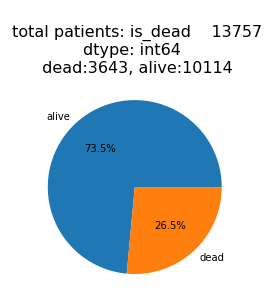

In [51]:
patients_filtered["is_dead"] = patients_filtered["dod"].notna()
subject_id_dead = patients_filtered.groupby(by="subject_id").agg({"is_dead":"sum"})
plt.pie((subject_id_dead["is_dead"] > 0).value_counts(), autopct='%1.1f%%', labels=["alive", "dead"])
total_num = subject_id_dead.count()
dead = (subject_id_dead["is_dead"] > 0).value_counts()[True]
alive = (subject_id_dead["is_dead"] > 0).value_counts()[False]
plt.title(f" \n total patients: {total_num} \n dead:{dead}, alive:{alive}" , fontsize=16)
plt.savefig("dead vs alive patients")